## Importing Libraries and Reading the csv file

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [47]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [48]:
df.shape

(568454, 10)

Since the dataset is large. We select the first 1000 rows.

In [49]:
df = df.head(1000)

In [50]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


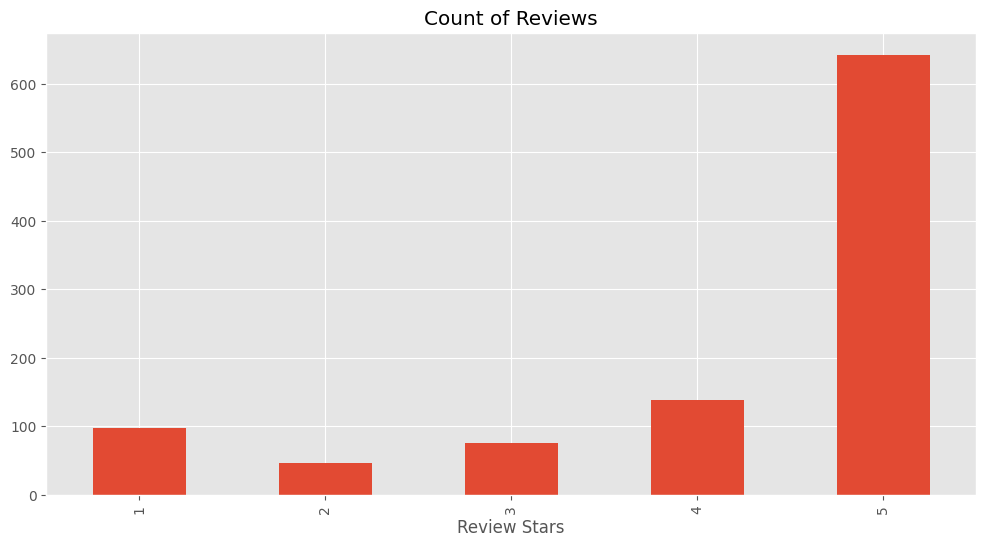

In [51]:
ax = df['Score'].value_counts().sort_index(ascending=True)\
.plot(kind='bar',title='Count of Reviews',figsize = (12,6))

ax.set_xlabel('Review Stars')
plt.show()

## Sentimental Analysis using VADER 

In [52]:
text = df['Text'][20]

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
sia = SentimentIntensityAnalyzer()

In [54]:
sia.polarity_scores('The sky is blue')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

scores['compound'] > 0.05:"Positive Sentiment"  
scores['compound'] < -0.05:"Negative Sentiment"  
else:"Neutral Sentiment"

In [55]:
res = {}
for i, row in tqdm(df.iterrows(),total = len(df)):
    text = row['Text']
    my_id  = row['Id']
    res[my_id] = sia.polarity_scores(text)

100%|██████████| 1000/1000 [00:01<00:00, 721.74it/s]


In [56]:
#Converting to a DataFrame
score_df = pd.DataFrame(res).T

In [57]:
score_df = score_df.reset_index().rename(columns = {'index' : 'Id','neg':'vader_neg','neu':'vader_neu','pos':'vader_pos'})
score_df = score_df.merge(df,how='left',on='Id')

In [58]:
score_df

,Id,vader_neg,vader_neu,vader_pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


Text(0.5, 1.0, 'Compund Score by Amazon Star Review')

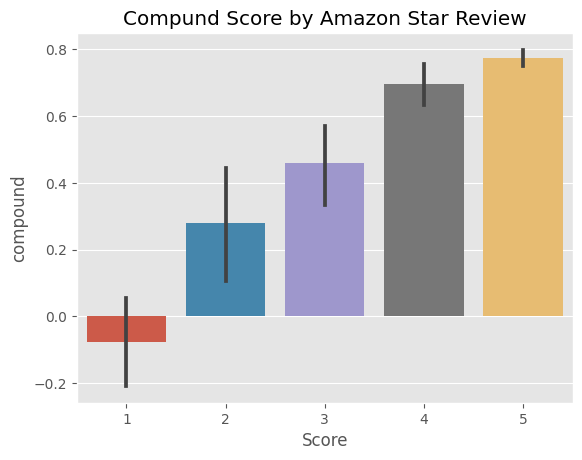

In [59]:
#Now let's plot the scores with the sentiment compound score
ax = sns.barplot(data = score_df, x='Score',y='compound')
ax.set_title('Compund Score by Amazon Star Review')

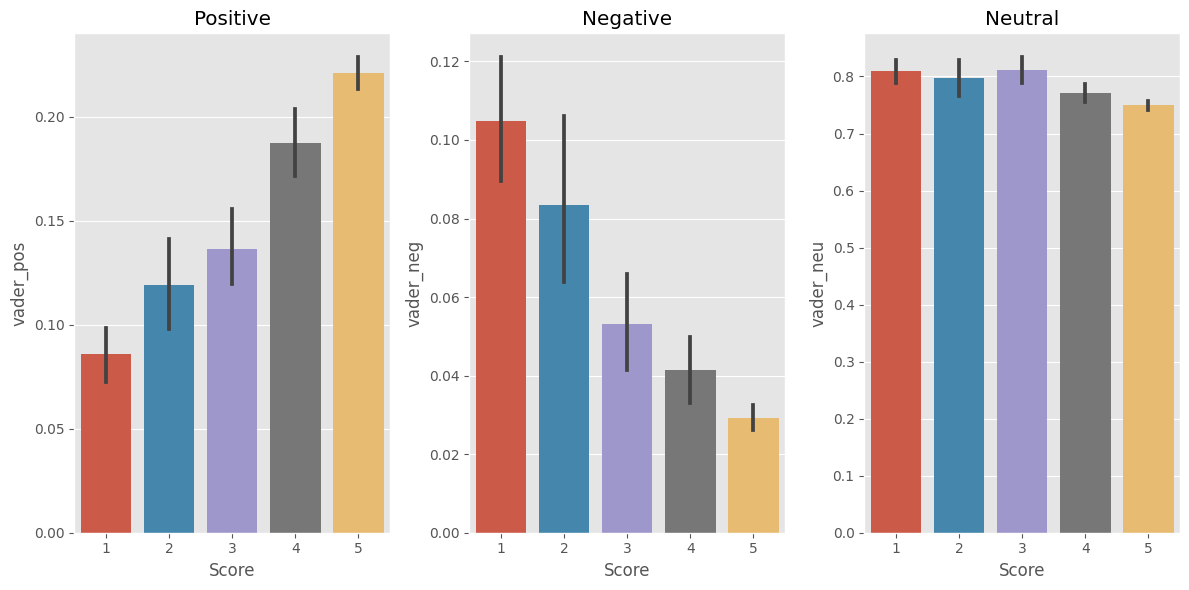

In [61]:
#creating subplots for positive negative and neutral
fig ,axs = plt.subplots(1,3,figsize= (12,6))
sns.barplot(data = score_df, x='Score',y='vader_pos',ax=axs[0])
sns.barplot(data = score_df, x='Score',y='vader_neg',ax=axs[1])
sns.barplot(data = score_df, x='Score',y='vader_neu',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [62]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [63]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [64]:
#example
example = df['Text'][50]
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores =output[0][0].detach().numpy()
scores = softmax(scores)
res = {'Positive':scores[0],
      'Negative' : scores[1],
      'Neutral' : scores[2]}

In [65]:
#Creating a function
def roberta_model(example):
    encoded_text = tokenizer(example,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    res = {'Positive':scores[0],
          'Negative' : scores[1],
          'Neutral' : scores[2]}
    return res

In [66]:
res = {}
for i, row in tqdm(df.iterrows(),total = len(df)):
    try:
        text = row['Text']
        my_id  = row['Id']
        vader_result = roberta_model(text)
        res[my_id]= vader_result
    except RuntimeError:
        print(f"RuntimeError for id{my_id}")

  8%|▊         | 82/1000 [00:18<02:22,  6.44it/s]

RuntimeError for id83


 19%|█▉        | 188/1000 [00:39<01:52,  7.21it/s]

RuntimeError for id187


 53%|█████▎    | 528/1000 [01:57<02:16,  3.47it/s]

RuntimeError for id529


 54%|█████▍    | 541/1000 [01:59<00:59,  7.71it/s]

RuntimeError for id540


 74%|███████▍  | 745/1000 [02:49<01:33,  2.73it/s]

RuntimeError for id746


 86%|████████▋ | 865/1000 [03:15<00:20,  6.49it/s]

RuntimeError for id863


100%|██████████| 1000/1000 [03:47<00:00,  4.39it/s]


In [67]:
robert_df = pd.DataFrame(res).T

In [68]:
robert_df = robert_df.reset_index().rename(columns={'index':'Id','Positive':'robert_pos','Negative':'robert_neg','Neutral':'robert_neu'})

In [69]:
combined_df = robert_df.merge(score_df,how='left')

In [71]:
combined_df.head(5)

,Id,robert_pos,robert_neg,robert_neu,vader_neg,vader_neu,vader_pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [72]:
combined_df.columns

Index(['Id', 'robert_pos', 'robert_neg', 'robert_neu', 'vader_neg',
       'vader_neu', 'vader_pos', 'compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [79]:
combined_df.isna().sum()

Id                        0
robert_pos                0
robert_neg                0
robert_neu                0
vader_neg                 0
vader_neu                 0
vader_pos                 0
compound                  0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

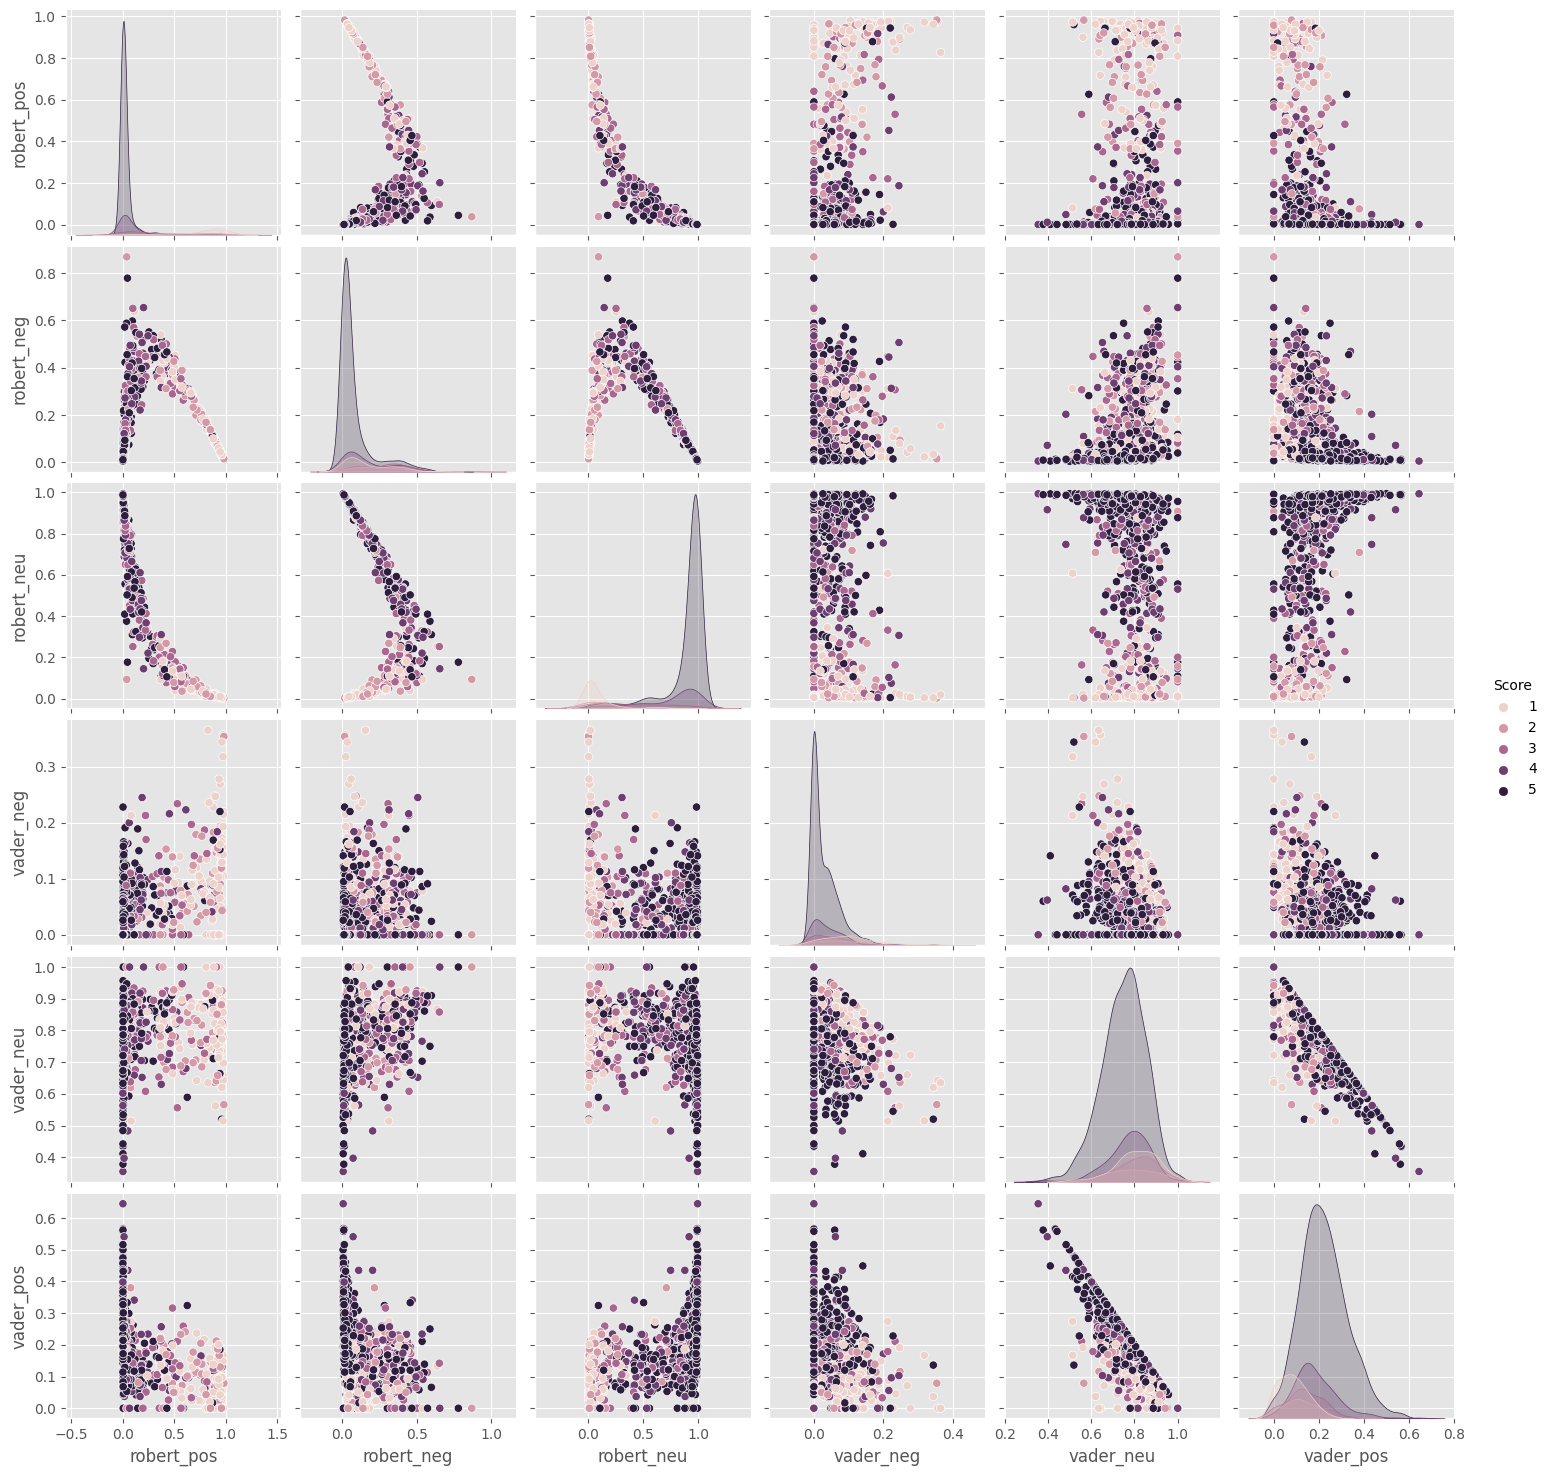

In [82]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(vars=['robert_pos', 'robert_neg', 'robert_neu', 'vader_neg',
       'vader_neu', 'vader_pos'],data=combined_df,hue='Score')

## Review Examples
Positive 1 Star and Negative 5 Star

For Roberta Model

In [98]:
combined_df.query('Score==1').sort_values('robert_pos',ascending=False)['Text'].values[1]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [97]:
combined_df.query('Score==5').sort_values('robert_neg',ascending=False)['Text'].values[1]

"My English Bulldog had skin allergies the summer we got him at age 3.  The vet recommended we wean him off the food his previous owner gave him (Iams Lamb and Rice) and onto a new kind.  This was the second one we tried, and it has been working ever since.  It's for dogs that need a limited diet who can be sensitive to additives and proteins commonly found in commercial dog food (like chicken or beef)."

For vader model

In [99]:
combined_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[1]

'Kettle chips now look, feel and taste like Lays.  These chips used to be my favorite when it was crinkle cut and hefty.  Now, no longer my favorite.'

In [100]:
combined_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[1]

'I love using this to sweeten tea, coffee, etc. It tastes much better than other low glycemic sweeteners - there is no bitter aftertaste.'

## Transformer Pipeline

In [101]:
from transformers import pipeline

2024-03-11 12:47:05.849486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 12:47:05.849757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 12:47:06.018644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [103]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [104]:
sent_pipeline('good and nice area to vibe')

[{'label': 'POSITIVE', 'score': 0.9998800754547119}]

In [105]:
sent_pipeline("I don't like the video ")

[{'label': 'NEGATIVE', 'score': 0.9969226717948914}]

## End